### To use your computer gpu for faster calculation you can use Cuda with pytorch  

Check your Cuda version (here 12.1) and Run the given command in the terminal accordingly with changes   <br>
pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

In [1]:
import torch

In [2]:
torch.cuda.is_available()


True

In [3]:
print(torch.version.cuda)

12.1


In [3]:
torch.cuda.device_count()

1

In [4]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3050 Laptop GPU'

In [2]:
import os
os.chdir("../")

In [3]:
import torch
from torch_geometric.data import Data

# Load the graph file
graph = torch.load("artifacts/data_transformation/fraud_graph.pt")

# Print basic details
print(graph)  # Shows the structure of the graph
print("Number of nodes:", graph.num_nodes)
print("Number of edges:", graph.num_edges)
print("Edge index:", graph.edge_index)  # Connectivity information


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21236\1878520002.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  graph = torch.load("artifacts/data_transformation/fraud_gra

Data(edge_index=[2, 24386900], edge_attr=[24386900, 10])
Number of nodes: 106482
Number of edges: 24386900
Edge index: tensor([[   0,    0,    0,  ..., 6138, 6138, 6138],
        [6139, 6139, 6140,  ..., 6146, 6289, 6194]])


d:\Final-Year-Project\Credit-Card-Fraud-Detection-Using-GNN\env\lib\site-packages\torch_geometric\data\storage.py:452: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'edge_index', 'edge_attr'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(


d:\Final-Year-Project\Credit-Card-Fraud-Detection-Using-GNN\env\lib\site-packages\torch_geometric\data\storage.py:452: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'edge_index', 'edge_attr'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(


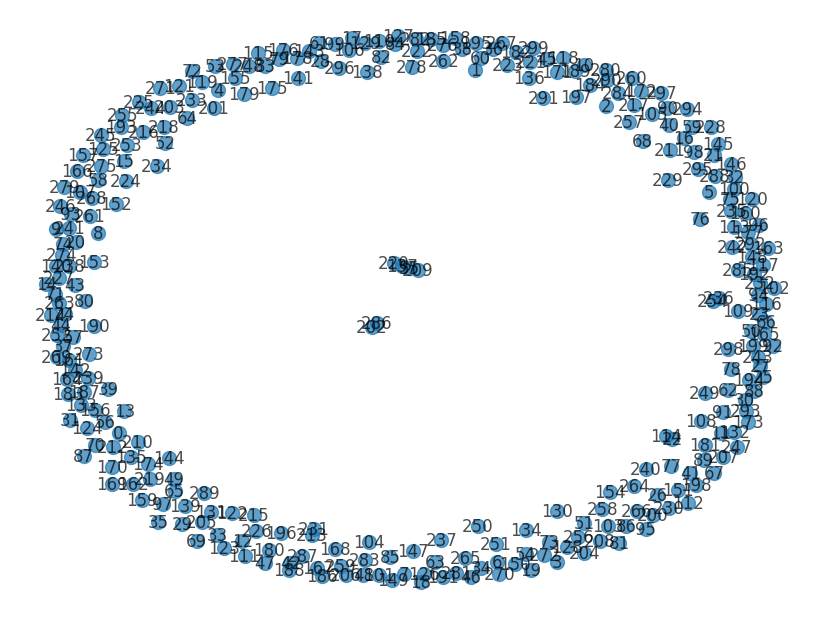

In [10]:
import torch
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx, subgraph
from torch_geometric.data import Data

# Ensure graph has num_nodes defined
if not hasattr(graph, 'num_nodes'):
    graph.num_nodes = graph.edge_index.max().item() + 1  # Infer from edge_index

# Number of nodes to visualize
num_nodes_to_sample = 300 

# Randomly select nodes
selected_nodes = torch.randint(0, graph.num_nodes, (num_nodes_to_sample,))

# Extract the subgraph while preserving edges
sub_edge_index, edge_mask = subgraph(selected_nodes, graph.edge_index, relabel_nodes=True)

# Ensure the subgraph retains edges
if sub_edge_index.size(1) == 0:
    print("⚠️ No edges found in the subgraph. Try increasing the number of sampled nodes.")

# Create a new PyG Data object for the subgraph
subgraph_data = Data(edge_index=sub_edge_index, num_nodes=num_nodes_to_sample)

# Convert to NetworkX
nx_subgraph = to_networkx(subgraph_data, to_undirected=True)

# Plot the small subgraph
plt.figure(figsize=(8, 6))
nx.draw(nx_subgraph, node_size=100, edge_color="gray", alpha=0.7, with_labels=True)
plt.show()


In [11]:
graph.edge_index.shape

torch.Size([2, 24386900])

In [ ]:
import torch
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx, subgraph
from torch_geometric.data import Data

# Load the graph file
graph = torch.load("artifacts/data_transformation/fraud_graph.pt")

# Print basic details
print(graph)  # Shows the structure of the graph
print("Number of nodes:", graph.num_nodes)
print("Number of edges:", graph.num_edges)
print("Edge index shape:", graph.edge_index.shape)  # Connectivity information

Subgraph has 0 edges.
⚠️ No edges found in the subgraph! Increasing sampled nodes to 100.


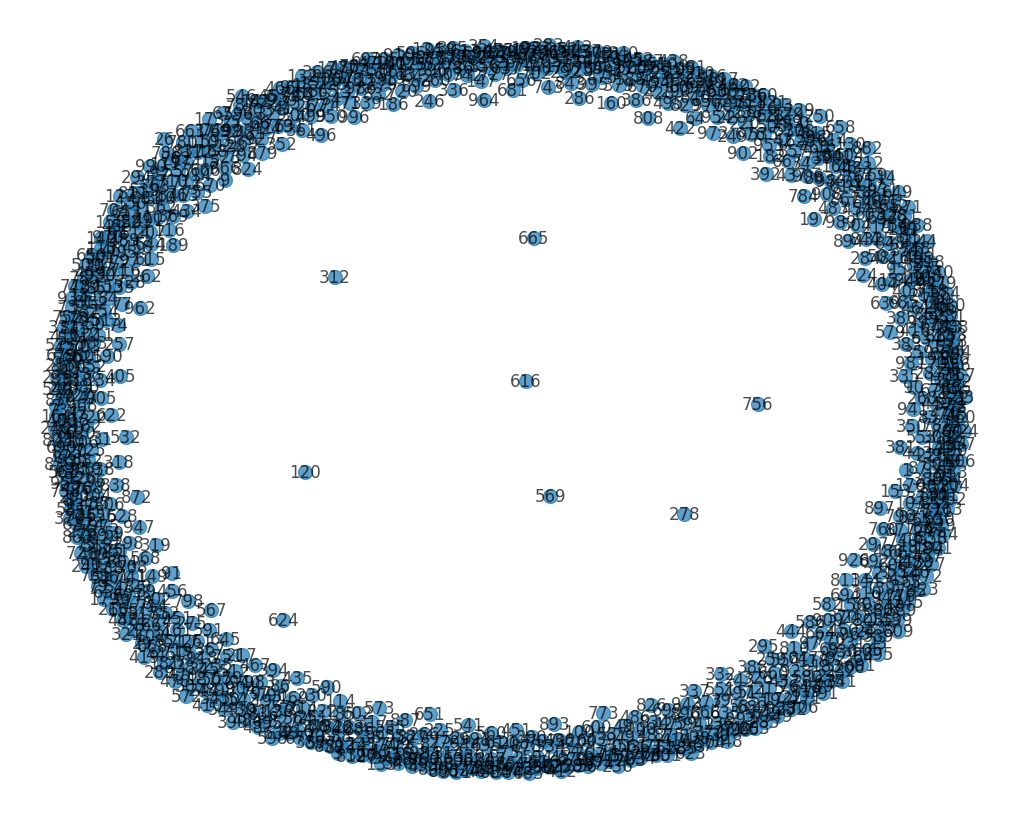

In [17]:


# Ensure graph has a valid num_nodes attribute
if not hasattr(graph, 'num_nodes') or graph.num_nodes is None:
    graph.num_nodes = graph.edge_index.max().item() + 1  

# Select nodes from **high-degree nodes** to ensure connectivity
num_nodes_to_sample = 500  # Adjust if needed
degree = torch.bincount(graph.edge_index[0])  # Compute node degrees
top_nodes = torch.argsort(degree, descending=True)[:num_nodes_to_sample]  # Pick high-degree nodes

# Extract the subgraph
sub_edge_index, edge_mask = subgraph(top_nodes, graph.edge_index, relabel_nodes=True)

# Debugging: Check extracted subgraph
print(f"Subgraph has {sub_edge_index.shape[1]} edges.")

# If subgraph has no edges, increase node sample size
if sub_edge_index.shape[1] == 0:
    print("⚠️ No edges found in the subgraph! Increasing sampled nodes to 100.")
    num_nodes_to_sample = 1000
    top_nodes = torch.argsort(degree, descending=True)[:num_nodes_to_sample]
    sub_edge_index, edge_mask = subgraph(top_nodes, graph.edge_index, relabel_nodes=True)

# Create new PyG data object
subgraph_data = Data(edge_index=sub_edge_index, num_nodes=num_nodes_to_sample)

# Convert to NetworkX and visualize
nx_subgraph = to_networkx(subgraph_data, to_undirected=True)

plt.figure(figsize=(10, 8))
nx.draw(nx_subgraph, node_size=100, edge_color="gray", alpha=0.7, with_labels=True)
plt.show()
